minx    2.882437e+05
miny    4.450945e+06
maxx    3.007477e+05
maxy    4.459839e+06
Name: 0, dtype: float64

array([[1248.46203613, 1247.04504395, 1247.18798828, ..., 2067.31005859,
        2066.38696289, 2065.78100586],
       [1250.57495117, 1247.94104004, 1247.39599609, ..., 2069.64404297,
        2068.50488281, 2067.6940918 ],
       [1252.10498047, 1250.78198242, 1249.07897949, ..., 2071.43701172,
        2070.5       , 2069.51000977],
       ...,
       [1496.03405762, 1496.1159668 , 1495.37304688, ...,  782.55102539,
         784.56097412,  787.27099609],
       [1494.82495117, 1494.57897949, 1494.26696777, ...,  781.82098389,
         783.90802002,  786.26702881],
       [1492.41601562, 1493.19396973, 1492.29602051, ...,  781.14898682,
         783.05102539,  785.35998535]])

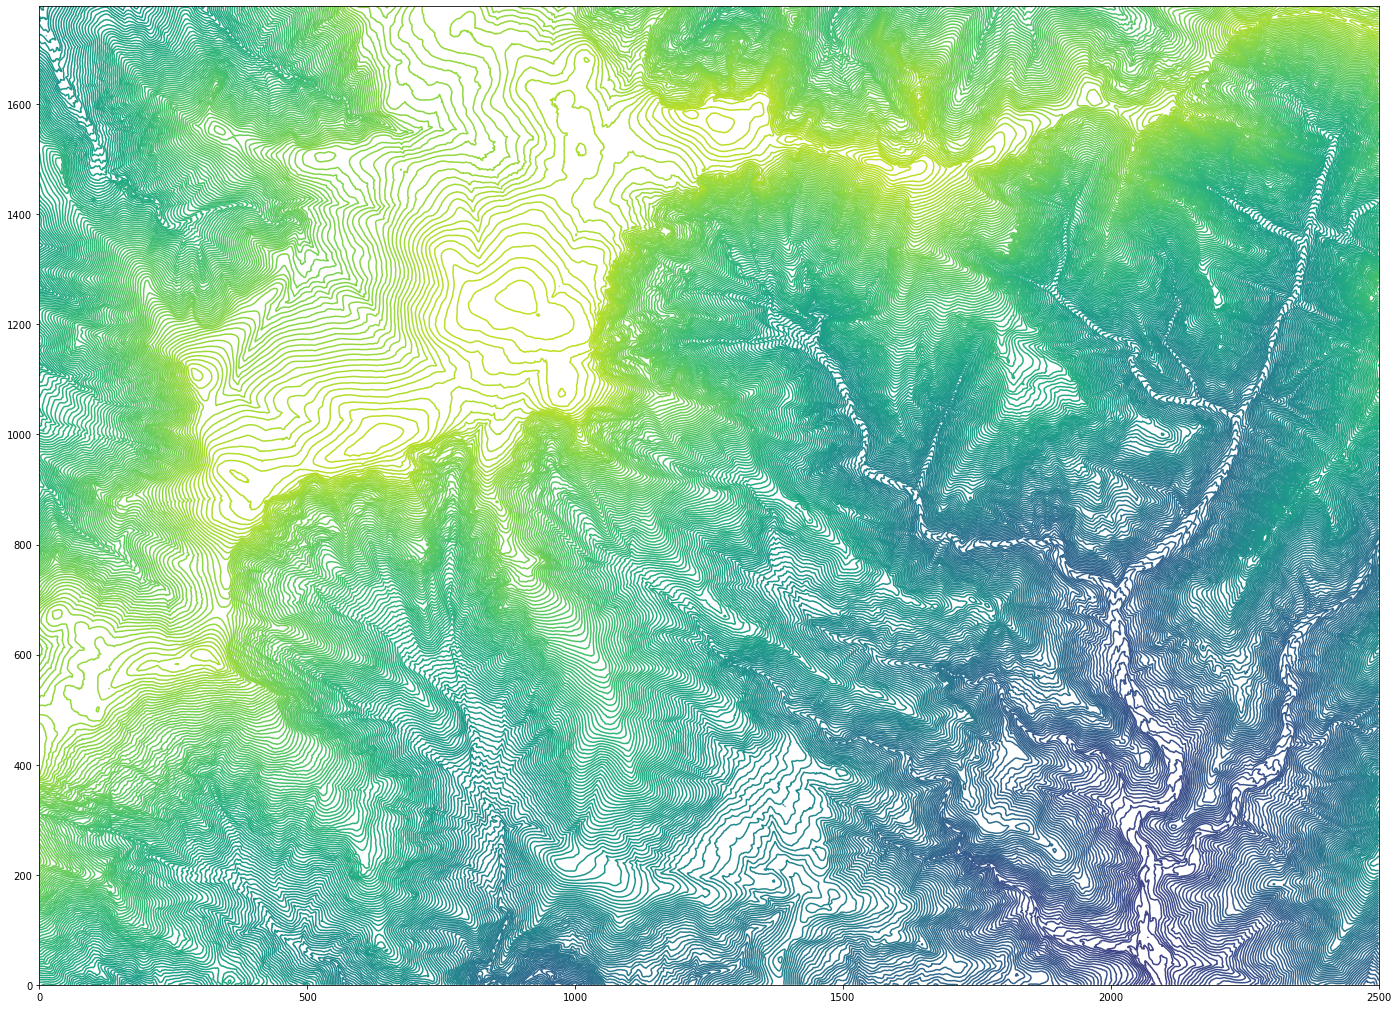

In [54]:
import psycopg2
import geopandas as gpd
from osgeo import gdal, osr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from config import config
import cartopy.crs as ccrs

params = config()
conn = psycopg2.connect(**params)

ze = gpd.read_postgis('select * from zona_estudio_madrigal', conn)
lim = ze.bounds.iloc[0]
display(lim)

gdal_data = gdal.Open('static/prueba.tif')
srs = osr.SpatialReference()
srs.ImportFromEPSG(25830)
gdal_data.SetProjection(srs.ExportToWkt())
# gdal.Translate('static/prueba.tif', gdal_data, projWin=(lim['minx'], lim['maxy'], lim['maxx'], lim['miny']))

gdal_band = gdal_data.GetRasterBand(1)

data_array = gdal_data.ReadAsArray().astype(np.float)
d = np.flipud(data_array)
display(data_array)
fig = plt.figure(figsize = (24,18))
ax = plt.axes()
plt.contour(d, levels = list(range(0,2500, 10)))
plt.show()